In [3]:
path_train = '../data/fraudTrain.csv'
path_test = '../data/fraudTest.csv'

In [4]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

dicionario dos dados :
* index - Unique Identifier for each row - **id unico**
* transdatetrans_time - Transaction DateTime -  **data da transação**
* cc_num - Credit Card Number of Customer - **numero do cartão**
* merchant - Merchant Name - **nome do comercio da transação**
* category - Category of Merchant -  **categoria do comercio**
* amt - Amount of Transaction - **valor da transação**
* first - First Name of Credit Card Holder - **primeiro nome do proprietario cartão**
* last - Last Name of Credit Card Holder - **ultimo nome do proprietario do cartão**
* gender - Gender of Credit Card Holder -  **genero do proprietario do cartão**
* street - Street Address of Credit Card Holder - **endereço do proprietario do cartão**
* city - City of Credit Card Holder - **endereço do proprietario do cartão**
* state - State of Credit Card Holder - **endereço do proprietario do cartão**
* zip - Zip of Credit Card Holder - **endereço do proprietario do cartão**
* lat - Latitude Location of Credit Card Holder - **locaização do proprietario do cartão**
* long - Longitude Location of Credit Card Holder- **locaização do proprietario do cartão**
* city_pop - Credit Card Holder's City Population -  **tamanho da populaçao da cidade do proprietario do cartão**
* job - Job of Credit Card Holder - **emprego do proprietario do cartão**
* dob - Date of Birth of Credit Card Holder -  **aniversario do proprietario**
* trans_num - Transaction Number -  **numero da transação do prorietario**
* unix_time - UNIX Time of transaction - **Hora da transação do UNIX -> em timestamp**
* merch_lat - Latitude Location of Merchant - **localização da transação**
* merch_long - Longitude Location of Merchant -  **localização da transação**
* is_fraud - Fraud Flag <--- Target Class -  **label para informar se há fraude ou não**

In [5]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [6]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
train["age"] = train["trans_date"]-train["dob"]
train["age"]=train["age"].astype('timedelta64[Y]')
test["age"] = test["trans_date"]-test["dob"]
test["age"]=test["age"].astype('timedelta64[Y]')

In [8]:
train.to_csv(path_or_buf="../data/train_clear.csv", index=False)
test.to_csv(path_or_buf="../data/test_clear.csv", index=False)

In [9]:
train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [10]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [11]:
total.to_csv(path_or_buf="../data/total.csv", index=False)

In [12]:
total.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

Vemos dados extramente desbalanceados

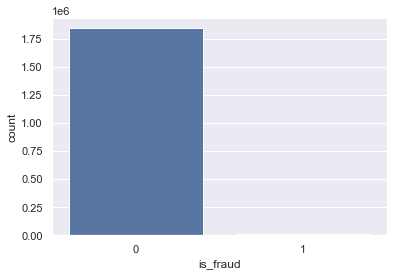

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_fraud", data=total)

In [14]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [15]:
name = {"first":"name", "last":"l_name"}
total.rename(columns= name, inplace=True)

# Selecionando o mais provavel perfil de fraude com Análises estatisticas

In [16]:
fraud = total[total['is_fraud']==1]

In [17]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'name', 'l_name', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age'],
      dtype='object')

In [18]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,l_name,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,2020-06-21,50.0
1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,2020-06-21,61.0
1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,2020-06-21,61.0
1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,2020-06-21,26.0
1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,2020-06-21,50.0


Nome e sobrenome com maior frequencia de fraude

In [19]:
fraud["name"].value_counts().head()

Christopher    248
David          190
Robert         180
Michael        149
Jennifer       143
Name: name, dtype: int64

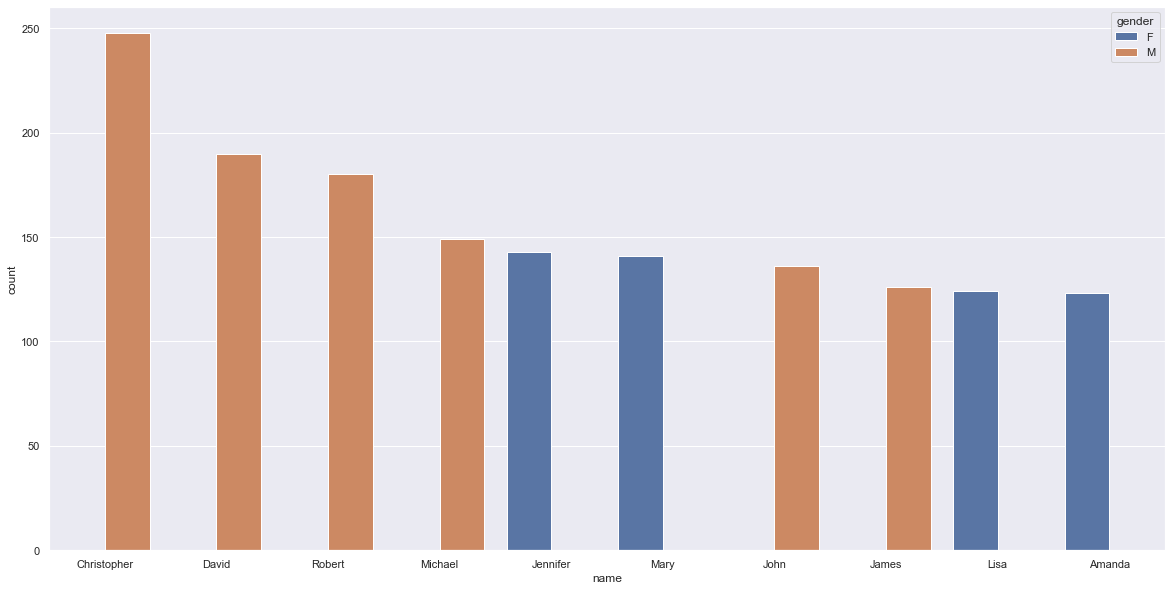

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(
        x="name",
        hue = "gender",
        data=fraud,
        order=pd.value_counts(fraud['name']).iloc[:10].index
                   )

In [21]:
fraud["l_name"].value_counts()

Johnson     194
Williams    179
Smith       168
Jones       158
Davis       142
           ... 
Tapia         4
Berry         3
Burton        3
Leblanc       3
Nolan         2
Name: l_name, Length: 482, dtype: int64

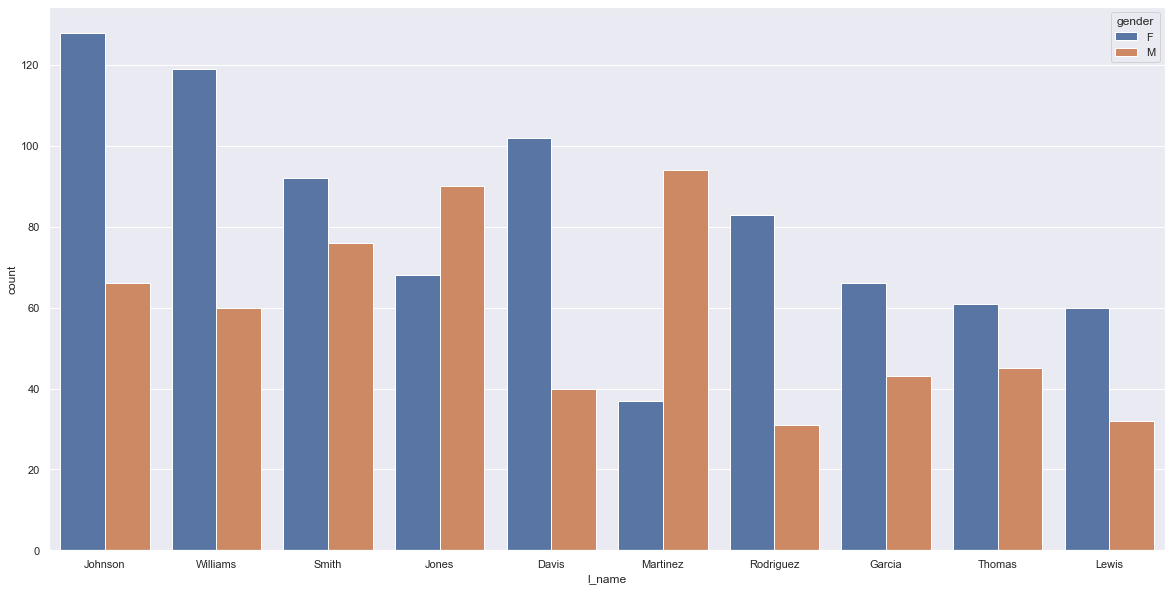

In [22]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(
    x="l_name",
    hue = "gender",
    data=fraud,
    order=pd.value_counts(fraud['l_name']).iloc[:10].index
)

Categoria com maior frequencia de fraud

In [23]:
fraud["category"].value_counts()

grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: category, dtype: int64

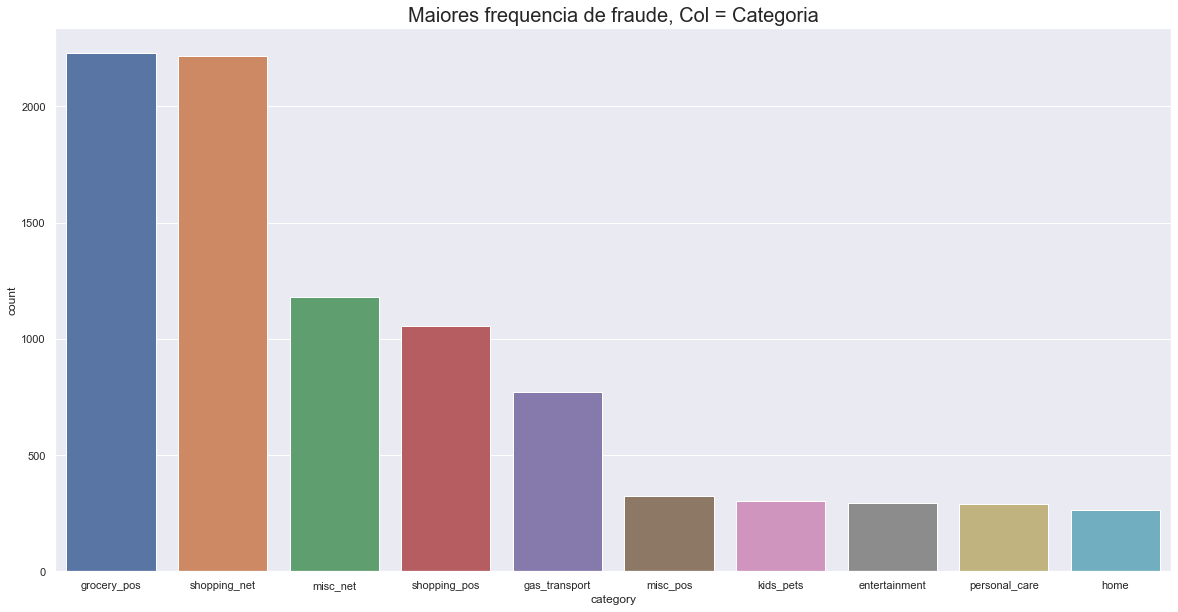

In [24]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.title("Maiores frequencia de fraude, Col = Categoria",size=20)
ax = sns.countplot(
    x="category",
    data=fraud,
    order=pd.value_counts(fraud['category']).iloc[:10].index
)

Vemos as duas maiores categorias com indícios de fraudes são grocery_pos e shopping_net

Identificando qual cidade de maior fraude

In [25]:
fraud["city"].value_counts()

Dallas           39
Houston          39
Birmingham       36
New York City    35
Camden           34
                 ..
Laramie           2
Littleton         2
Kilgore           2
Phenix City       2
Sherman           2
Name: city, Length: 887, dtype: int64

Text(0.5, 1.0, 'Número de fraudes por cidade')

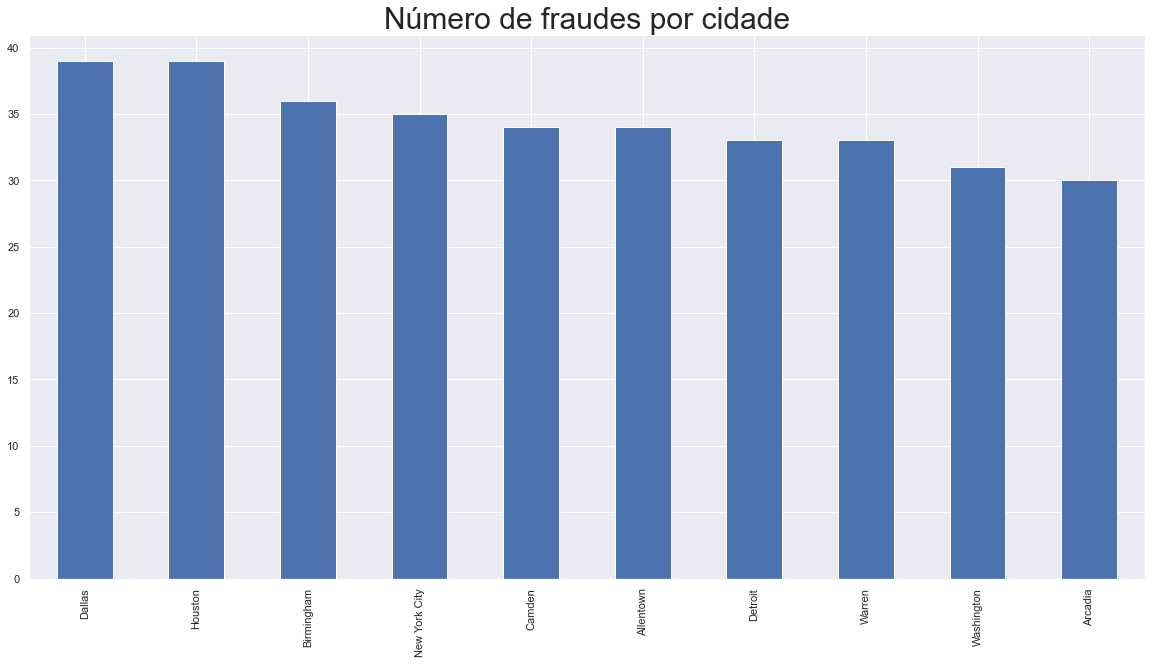

In [26]:
plt.figure(figsize=(20,10))
total[total['is_fraud']==1]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar")
plt.title("Número de fraudes por cidade",size=30)

Vemos que as cidades com o maior número de fraudes são Dallas e Huston com 39 indícios, seguido por Birmingha, NY e Camdoen

Frades por estado

In [27]:
total.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,l_name,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,52.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,30.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,49.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,32.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,64.0


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


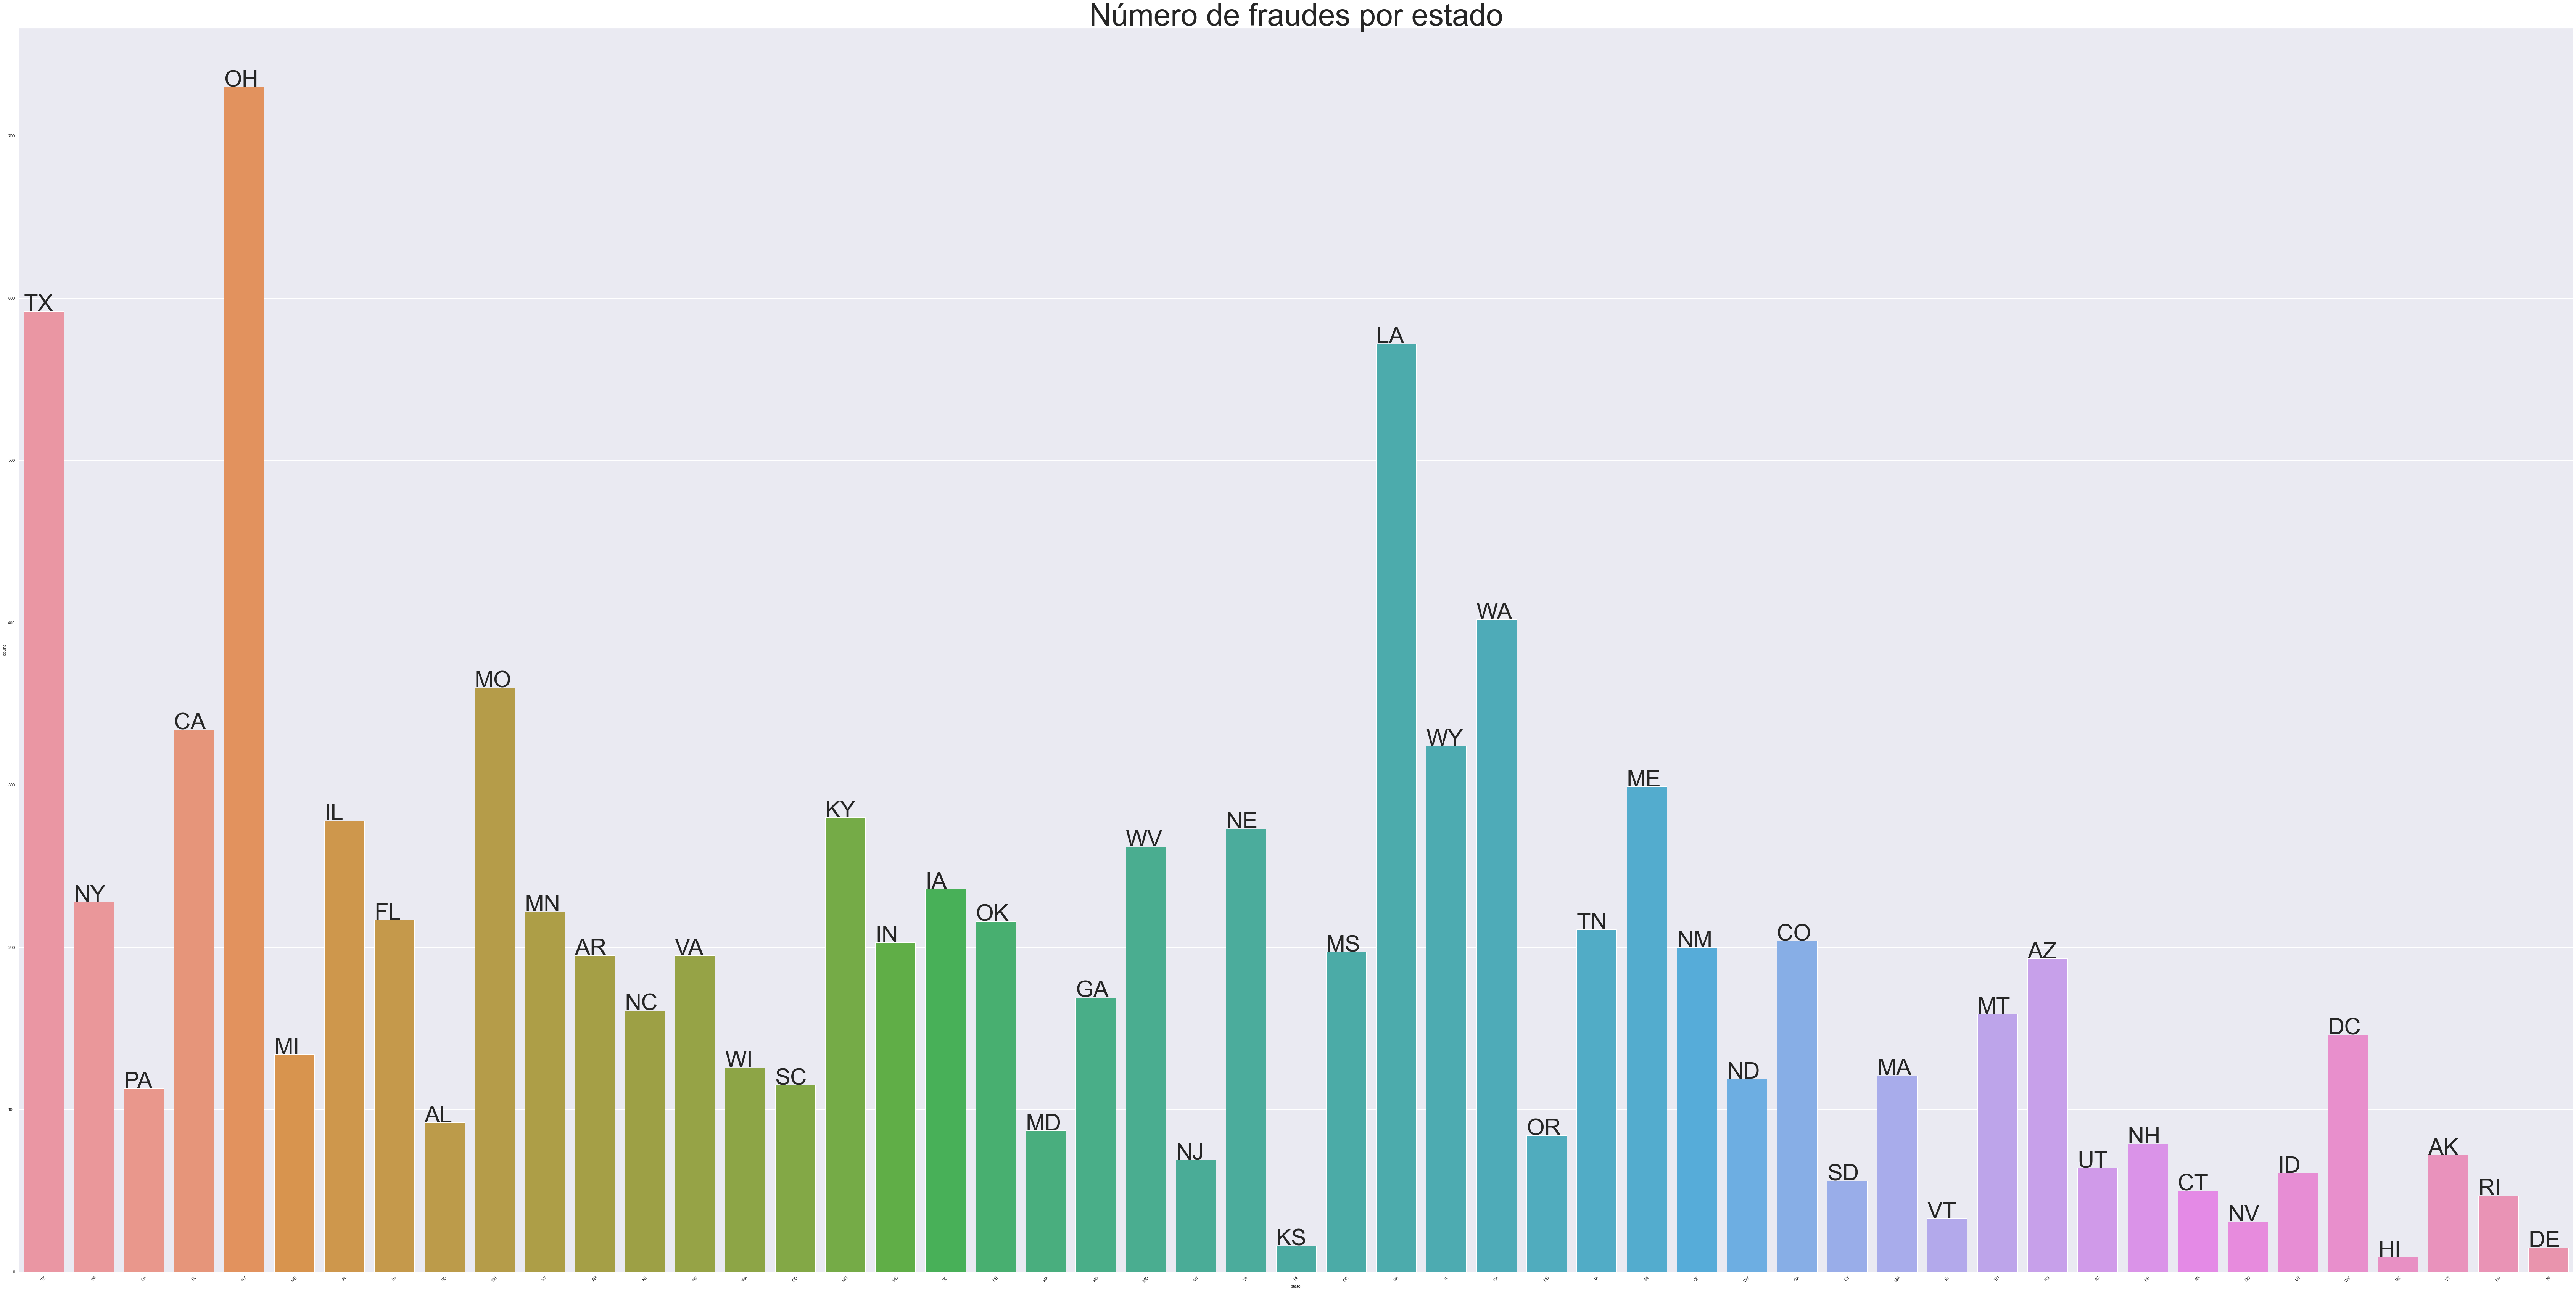

In [28]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud']==1].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.17))
plt.title("Número de fraudes por estado",size=80)
plt.show();

Podemos ver no gráfico que estados com maiores fraudes são eles OH,TX, LA,WA

vamos criar uma nova feature para medir a idade das vitimas de fraude

In [29]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [30]:
total

,trans_date_trans_time,cc_num,merchant,category,amt,name,l_name,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,52.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,30.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,49.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,32.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21,58.0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21,40.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21,52.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21,39.0


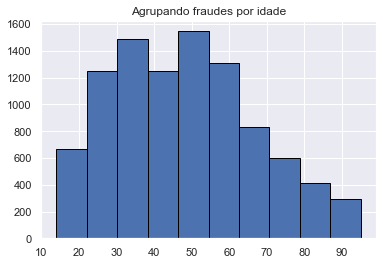

In [31]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 10)
plt.title("Agrupando fraudes por idade")
plt.show()

Vemos que a maioria das vítimas possui em tonor de 50 anos, e a segunda maior amostra é em torno de 30 a 40 anos

## Trabalho com maior número de fraude

Text(0.5, 1.0, 'Número de fraudes por trabalho')

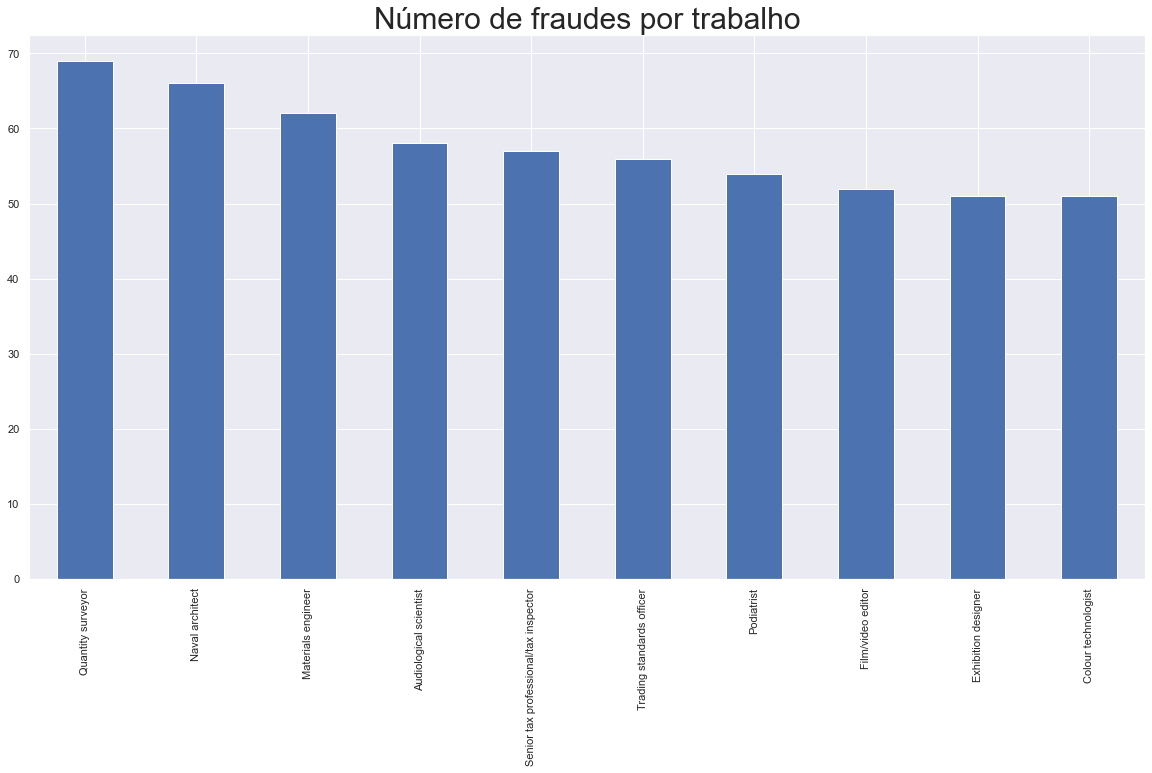

In [32]:
plt.figure(figsize=(20,10))
total[total['is_fraud']==1]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar")
plt.title("Número de fraudes por trabalho",size=30)

Text(0.5, 1.0, 'Número de fraudes por trabalho')

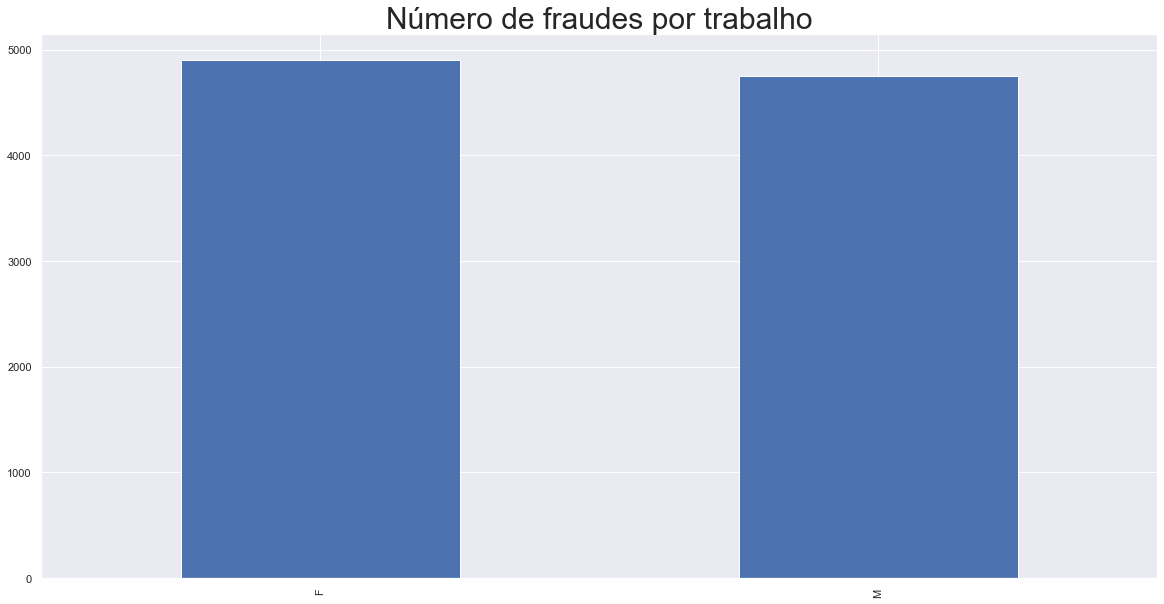

In [33]:
plt.figure(figsize=(20,10))
total[total['is_fraud']==1]["gender"].value_counts(sort=True,ascending=False).plot(kind="bar")
plt.title("Número de fraudes por sexo",size=30)